In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
df = pd.read_pickle("Preprocessing/pickle_for_analysis/df_final.pickle")
df

,title,vote_count,release_date,revenue,runtime,budget,genres,production_countries,inflation,inflated_budget,inflated_revenue,percentual_of_revenue
0,Inception,34495,2010,825532764,148,160000000,"Action, Science Fiction, Adventure","United Kingdom, United States of America",218.0,73394495.0,3.786848e+08,515.957977
1,Interstellar,32571,2014,701729206,169,165000000,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",236.0,69915254.0,2.973429e+08,425.290428
2,The Dark Knight,30619,2008,1004558444,152,185000000,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",215.0,86046511.0,4.672365e+08,543.004564
3,Avatar,29815,2009,2923706026,162,237000000,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",214.0,110747663.0,1.366218e+09,1233.631235
4,The Avengers,29166,2012,1518815515,143,220000000,"Science Fiction, Action, Adventure",United States of America,229.0,96069868.0,6.632382e+08,690.370689
...,...,...,...,...,...,...,...,...,...,...,...,...
10650,The Color of Your Skin,0,2019,70000,65,25000,Documentary,United Kingdom,255.0,9803.0,2.745000e+04,280.000000
10651,Love on Demand,0,2019,75000,63,25000,Documentary,United Kingdom,255.0,9803.0,2.941100e+04,300.000000
10652,Brazen Epiphany,0,2019,1500,30,500,"Documentary, Drama, Thriller",India,255.0,196.0,5.880000e+02,300.000000
10653,Tour on Mud,0,2017,1000,18,700,"Documentary, Comedy",Indonesia,245.0,285.0,4.080000e+02,142.857143


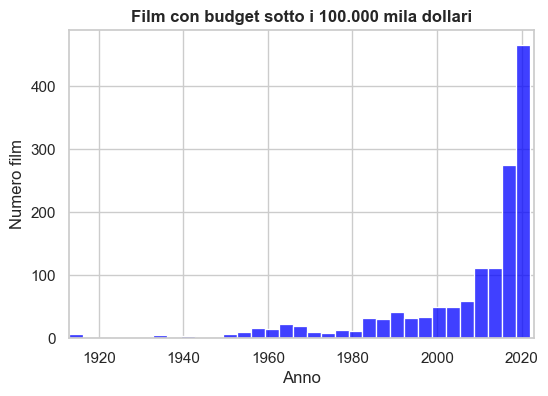

In [17]:
#vedere la densità di film con budget minore di 100000 dollari negli anni
df_lowbudget = df[df["budget"] < 100000]
sns.set(style = "whitegrid", font_scale=1)
fig = plt.figure(figsize = (6, 4))
sns.histplot(df_lowbudget["release_date"], color="Blue")
plt.xlabel("Anno")
plt.ylabel("Numero film")
plt.title("Film con budget sotto i 100.000 mila dollari", weight="bold")
plt.xlim(1913, 2023)

plt.show()

                 


In [3]:
#vedere tutti i film dei diversi generi:
df_animation = df
df_action = df
df_drama = df
df_science_fiction = df
df_romance = df
for i in range(10655):
    lista = df["genres"][i].split(",")
    lista = [f.strip() for f in lista]
    if "Animation" not in lista:
        df_animation = df_animation.drop(labels = i, axis = 0)
    if "Action" not in lista:
        df_action = df_action.drop(labels = i, axis = 0) 
    if "Drama" not in lista:
        df_drama = df_drama.drop(labels = i, axis = 0) 
    if "Science Fiction" not in lista:
        df_science_fiction = df_science_fiction.drop(labels = i, axis = 0) 
    if "Romance" not in lista:
        df_romance = df_romance.drop(labels = i, axis = 0) 
print("Animation:")
print(len(df_animation))
print("Action:")
print(len(df_action))
print("Drama:")
print(len(df_drama))
print("Science Fiction:")
print(len(df_science_fiction))
print("Romance:")
print(len(df_romance))



Animation:
591
Action:
2488
Drama:
4993
Science Fiction:
984
Romance:
1940


In [4]:
#creo un dataset che mi restituisce il numero di film per ogni anno ed il budget, revenue, inflated_budget, inflated_revenue medio
data = []
for year in range(1913, 2023):
    inflated_revenue_mean = df[df["release_date"] == year]["inflated_revenue"].mean()
    revenue_mean = df[df["release_date"] == year]["revenue"].mean()
    inflated_budget_mean = df[df["release_date"] == year]["inflated_budget"].mean()
    budget_mean = df[df["release_date"] == year]["budget"].mean()
    n_films = len(df[df["release_date"] == year])
    data.append([year, n_films, budget_mean, inflated_budget_mean, revenue_mean, inflated_revenue_mean])
df_n_films = pd.DataFrame(data, columns=["year", "number_films", "budget_mean", "inflated_budget_mean", "revenue_mean", "inflated_revenue_mean"])
df_n_films0 = df_n_films.drop(labels=4, axis=0)
df_n_films0

,year,number_films,budget_mean,inflated_budget_mean,revenue_mean,inflated_revenue_mean
0,1913,1,5.700000e+03,6.333300e+04,1.800000e+06,2.000000e+07
1,1914,2,1.118994e+06,1.118994e+07,2.930014e+06,2.930014e+07
2,1915,4,3.872325e+04,3.872325e+05,2.835506e+06,2.835506e+07
3,1916,4,4.011205e+05,4.011205e+06,2.810692e+06,2.810692e+07
5,1918,2,1.265000e+05,8.433330e+05,4.001500e+06,2.667667e+07
...,...,...,...,...,...,...
105,2018,385,2.135267e+07,8.507039e+06,7.845096e+07,3.125536e+07
106,2019,330,2.478261e+07,9.718669e+06,8.879399e+07,3.482117e+07
107,2020,216,1.488053e+07,5.767645e+06,2.354287e+07,9.125145e+06
108,2021,291,2.371313e+07,8.782642e+06,4.826607e+07,1.787632e+07


Text(1990, 2500000, 'COVID-19')

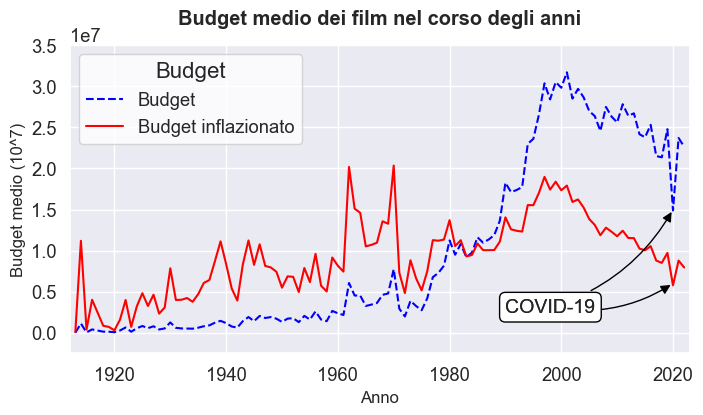

In [33]:
#grafico di budget e inflated_budget
sns.set(style = "darkgrid", font_scale = 1.2)
plt.figure(figsize = (8, 4))
plt.plot(df_n_films0["year"], df_n_films0["budget_mean"], color="blue", linestyle="dashed")
plt.plot(df_n_films0["year"], df_n_films0["inflated_budget_mean"], color="red")
plt.legend(labels=["Budget", "Budget inflazionato"], loc="upper left", title="Budget", title_fontsize=16, facecolor="white")
plt.title("Budget medio dei film nel corso degli anni", weight="bold", pad=15)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Budget medio (10^7)", fontsize=12)
plt.xlim(1912, 2023)
plt.axis([1912, 2023, -2500000, 35000000])
plt.annotate(text="COVID-19", xy= (2020, 15000000), xytext=(1990, 2500000), fontsize=14, arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=0.2", color="black"), bbox=dict(boxstyle="round", edgecolor="black", facecolor="white"))
plt.annotate(text="COVID-19", xy= (2020, 6000000), xytext=(1990, 2500000), fontsize=14, arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=0.2", color="black"))

Text(1992, -10000000, 'COVID-19')

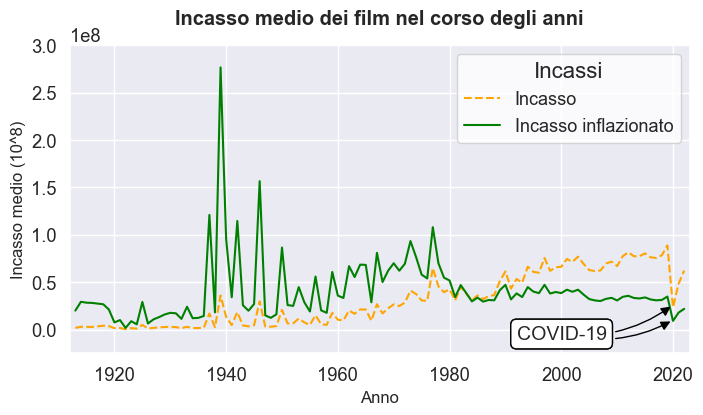

In [32]:
#grafico di revenue e inflated_revenue
sns.set(style = "darkgrid", font_scale=1.2)
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(df_n_films0["year"], df_n_films0["revenue_mean"], color="orange", linestyle="dashed")
plt.plot(df_n_films0["year"], df_n_films0["inflated_revenue_mean"], color="green")
plt.legend(labels = ["Incasso", "Incasso inflazionato"], loc="upper right", fontsize=13, title="Incassi", title_fontsize=16, facecolor="white")
plt.title("Incasso medio dei film nel corso degli anni", weight="bold", pad=15)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Incasso medio (10^8)", fontsize=12)
plt.xlim(1912, 2023)
plt.axis([1912, 2023, -25000000, 300000000])
plt.annotate(text="COVID-19", xy= (2020, 26000000), xytext=(1992, -10000000), fontsize=14, arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=0.2", color="black"), bbox=dict(boxstyle="round", edgecolor="black", facecolor="white"))
plt.annotate(text="COVID-19", xy= (2020, 10000000), xytext=(1992, -10000000), fontsize=14, arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=0.2", color="black"), bbox=dict(boxstyle="round", edgecolor="black", facecolor="white"))

Text(1965, 270, 'COVID-19')

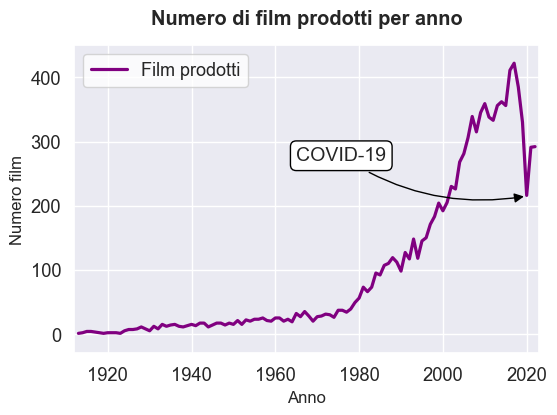

In [61]:
#creazione nuovo dataframe con group_by per poter fare un grafico anno-numero film
g = df.groupby("release_date").count()
g["release_date"] = g.index

sns.set(style = "darkgrid", font_scale = 1.2)
plt.figure(figsize = (6, 4))
plt.plot(g["release_date"], g["title"], linewidth=2.3, color="purple")
plt.axis([1912, 2023, -30, 450])
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero film", fontsize=12)
plt.title("Numero di film prodotti per anno", weight="bold", pad=15)
plt.legend(labels = ["Film prodotti"], loc="upper left", fontsize=13, facecolor="white")
plt.annotate(text="COVID-19", xy= (2020, 215), xytext=(1965, 270), fontsize=14, arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3, rad=0.2", color="black"), bbox=dict(boxstyle="round", edgecolor="black", facecolor="white"))

In [6]:
#aggiungo la colonna budget_sector a df
for a in range(10655):
    if df["budget"][a] >= 300000000:
        df.loc[a, "budget_sector"] = "Sopra 300 milioni"
    elif 200000000 <= df["budget"][a] < 300000000:
        df.loc[a, "budget_sector"] = "Da 200 a 300 milioni"
    elif 100000000 <= df["budget"][a] < 200000000:
        df.loc[a, "budget_sector"] = "Da 100 a 200 milioni"
    elif 50000000 <= df["budget"][a] < 100000000:
        df.loc[a, "budget_sector"] = "Da 50 milioni a 100 milioni"
    elif 10000000 <= df["budget"][a] < 50000000:
        df.loc[a, "budget_sector"] = "Da 10 milioni a 50 milioni"
    elif 1000000 <= df["budget"][a] < 10000000:
        df.loc[a, "budget_sector"] = "Da 1 a 10 milioni"
    elif 100000 <= df["budget"][a] < 1000000:
        df.loc[a, "budget_sector"] = "Da 100 mila a 1 milione"
    elif 10000 <= df["budget"][a] < 100000:
        df.loc[a, "budget_sector"] = "Da 10 a 100 mila"
    else:
        df.loc[a, "budget_sector"] = "Sotto i 10 mila"
df
        

,title,vote_count,release_date,revenue,runtime,budget,genres,production_countries,inflation,inflated_budget,...,Crime,Thriller,Fantasy,Comedy,Romance,Western,Documentary,Animation,film_era,budget_sector
0,Inception,34495,2010,825532764,148,160000000,"Action, Science Fiction, Adventure","United Kingdom, United States of America",218.0,73394495.0,...,False,False,False,False,False,False,False,False,Oltre il 2000,Da 100 a 200 milioni
1,Interstellar,32571,2014,701729206,169,165000000,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",236.0,69915254.0,...,False,False,False,False,False,False,False,False,Oltre il 2000,Da 100 a 200 milioni
2,The Dark Knight,30619,2008,1004558444,152,185000000,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",215.0,86046511.0,...,True,True,False,False,False,False,False,False,Oltre il 2000,Da 100 a 200 milioni
3,Avatar,29815,2009,2923706026,162,237000000,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",214.0,110747663.0,...,False,False,True,False,False,False,False,False,Oltre il 2000,Da 200 a 300 milioni
4,The Avengers,29166,2012,1518815515,143,220000000,"Science Fiction, Action, Adventure",United States of America,229.0,96069868.0,...,False,False,False,False,False,False,False,False,Oltre il 2000,Da 200 a 300 milioni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,The Color of Your Skin,0,2019,70000,65,25000,Documentary,United Kingdom,255.0,9803.0,...,False,False,False,False,False,False,True,False,Oltre il 2000,Da 10 a 100 mila
10651,Love on Demand,0,2019,75000,63,25000,Documentary,United Kingdom,255.0,9803.0,...,False,False,False,False,False,False,True,False,Oltre il 2000,Da 10 a 100 mila
10652,Brazen Epiphany,0,2019,1500,30,500,"Documentary, Drama, Thriller",India,255.0,196.0,...,False,True,False,False,False,False,True,False,Oltre il 2000,Sotto i 10 mila
10653,Tour on Mud,0,2017,1000,18,700,"Documentary, Comedy",Indonesia,245.0,285.0,...,False,False,False,True,False,False,True,False,Oltre il 2000,Sotto i 10 mila


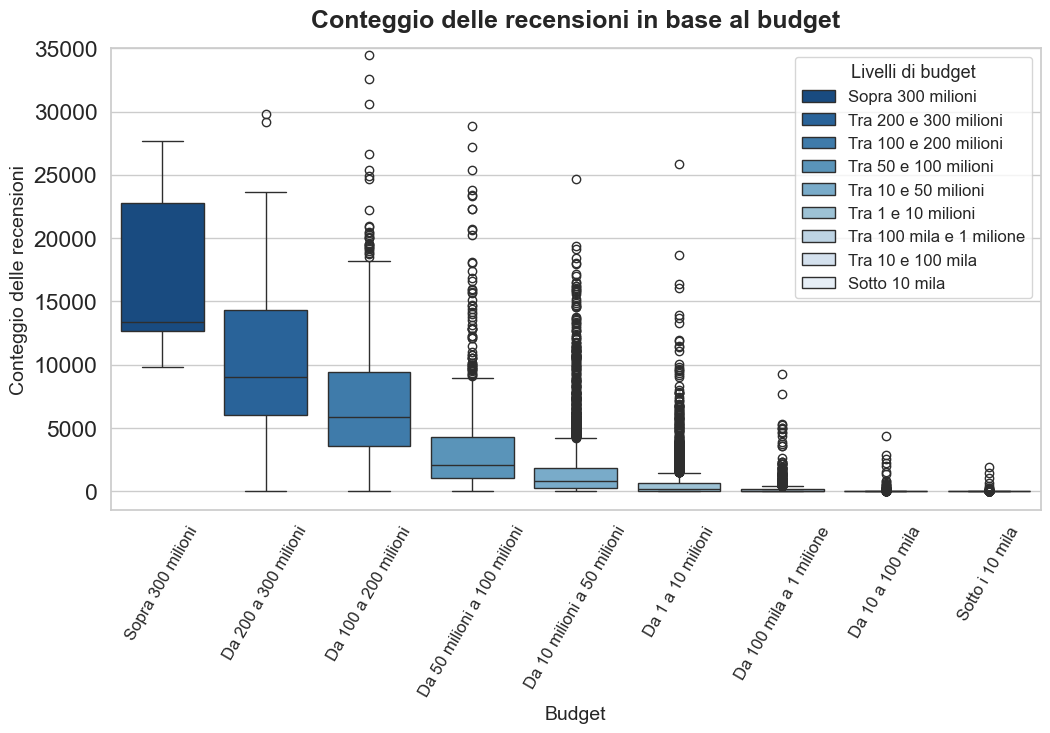

In [7]:
#grafico con la differenza di popolarità per diversi budget
df_bigbudget = df.sort_values(by="budget", ascending=False)
sns.set(style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(df_bigbudget, y = "vote_count", x = "budget_sector", hue="budget_sector", legend=False, palette="Blues_r")
plt.xticks(rotation=60, fontsize="12")
plt.ylim(-1500, 35000)
plt.ylabel("Conteggio delle recensioni", fontsize=14)
plt.xlabel("Budget", fontsize=14)
plt.title("Conteggio delle recensioni in base al budget", weight="bold", pad=15)
plt.legend(labels = ["Sopra 300 milioni", "Tra 200 e 300 milioni", "Tra 100 e 200 milioni", "Tra 50 e 100 milioni", "Tra 10 e 50 milioni", "Tra 1 e 10 milioni", "Tra 100 mila e 1 milione", "Tra 10 e 100 mila", "Sotto 10 mila"], title="Livelli di budget", title_fontsize=13, fontsize=12)



In [18]:
#creo un nuovo dataframe con tutti i paesi ed il rispettivo numero di film e la media dei budget di quei film
lista_di_paesi = []
lista_numero_film = []
lista_somma_budget = []
for i in range(10655):
    lista = df["production_countries"][i].split(",")
    lista = [f.strip() for f in lista]
    for paese in lista:
        if paese not in lista_di_paesi:
            lista_di_paesi.append(paese)
            lista_numero_film.append(1)
            lista_somma_budget.append(df["budget"][i])
        else:
            lista_numero_film[lista_di_paesi.index(paese)] = lista_numero_film[lista_di_paesi.index(paese)] + 1
            lista_somma_budget[lista_di_paesi.index(paese)] = lista_somma_budget[lista_di_paesi.index(paese)] + df["budget"][i]
dati_paesi_film = []
for paese in lista_di_paesi:
    dati_paesi_film.append([paese, lista_numero_film[lista_di_paesi.index(paese)], lista_somma_budget[lista_di_paesi.index(paese)]])
df_paesi = pd.DataFrame(data = dati_paesi_film, columns = ["state", "films", "mean_budget"])

for a in range(125):
    df_paesi.loc[a, "mean_budget"] = df_paesi.loc[a, "mean_budget"] // df_paesi.loc[a, "films"]
df_paesi0 = df_paesi.sort_values(by="films", ascending=True).reset_index(drop=True)
df_paesi0

,state,films,mean_budget
0,Azerbaijan,1,378378
1,Liechtenstein,1,35000000
2,Macao,1,14000000
3,Botswana,1,5000000
4,Bosnia and Herzegovina,1,500
...,...,...,...
120,Germany,551,29664285
121,India,705,7237539
122,France,793,18752925
123,United Kingdom,1187,28935853


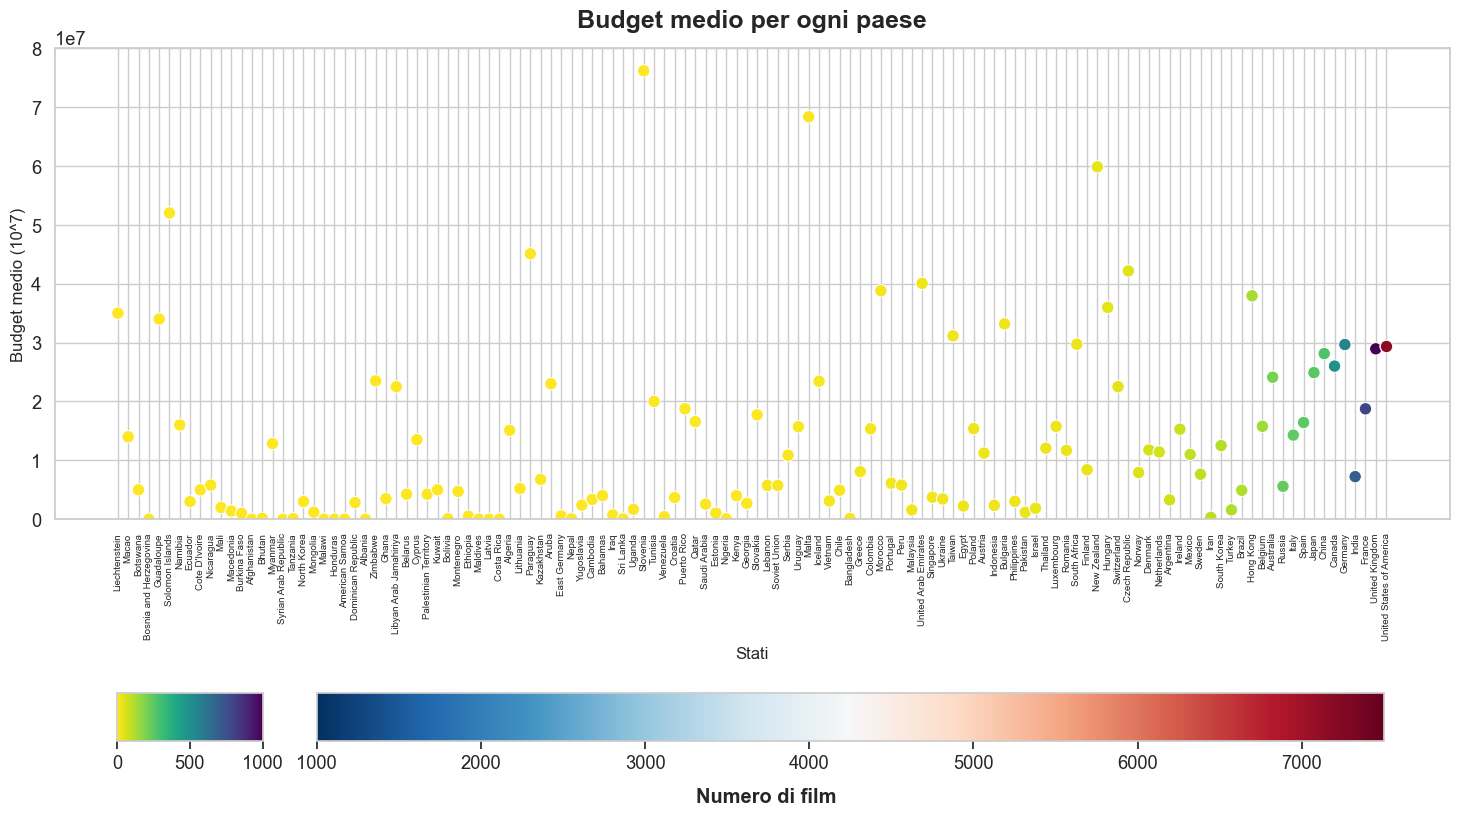

In [19]:
#Vedendo la media dei budget non sembra che lo stato con più film ha pure un budget maggiore, ma...
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(18, 9))
sns.scatterplot(x=df_paesi0["state"].loc[1:], y=df_paesi0["mean_budget"].loc[1:], c=df_paesi0["films"].loc[1:], cmap = "viridis_r", s=80, legend=False, vmin=0, vmax=1000)
sns.scatterplot(x=df_paesi0[df_paesi0["state"] == "United States of America"]["state"], y=df_paesi0[df_paesi0["state"] == "United States of America"]["mean_budget"], c=df_paesi0[df_paesi0["state"] == "United States of America"]["films"], s=80, cmap = "RdBu_r", legend=False, vmin=1000, vmax=7500)

plt.title("Budget medio per ogni paese", weight="bold", fontsize= 18, pad=15)
plt.xlabel("Stati", fontsize=12)
plt.ylabel("Budget medio (10^7)", fontsize=12)
plt.ylim(0, 80000000)

normalize1 = Normalize(vmin=0, vmax=1000)
normalize2 = Normalize(vmin=1000, vmax=7500)

plt.colorbar(ScalarMappable(norm=normalize1, cmap="viridis_r"), ax = ax, location = "bottom", orientation = "horizontal", pad = -0.07, fraction =0.07, aspect = 3, anchor = (0.05, 1.0))
cbar_2 = plt.colorbar(ScalarMappable(norm=normalize2, cmap="RdBu_r"), ax = ax, location = "bottom", orientation = "horizontal", pad = 0.25, fraction = 0.07, aspect = 22, anchor = (0.8, 1.0))

plt.xticks(rotation=90, fontsize=7)
plt.annotate(text="Numero di film", xycoords=ax, xy=(0, 0), xytext=(0.46, -0.6), weight="bold")
plt.show()


In [20]:
#...ma prendendo i primi 1000 film per grandezza del budget, sono tutti (o quasi) degli USA
df_first1000 = df.sort_values(by="budget", ascending=False).head(1000)
df_first1000_ = df_first1000.reset_index(drop=True)
for i in range(1000):
    lista_0 = df_first1000_["production_countries"][i].split(",")
    lista_0 = [f.strip() for f in lista_0]
    if "United States of America" in lista_0:
        df_first1000_.loc[i, "produced_by_USA"] = "United States of America"
    else:
        df_first1000_.loc[i, "produced_by_USA"] = "Altri stati"
    if ("United Kingdom" in lista_0) & ("United States of America" in lista_0):
        df_first1000_.loc[i, "produced_by_UK"] = "United States of America"
    else:
        df_first1000_.loc[i, "produced_by_UK"] = "Altri stati"
df_first1000_

,title,vote_count,release_date,revenue,runtime,budget,genres,production_countries,inflation,inflated_budget,inflated_revenue,percentual_of_revenue,produced_by_USA,produced_by_UK
0,Avatar: The Way of Water,9830,2022,2320250281,192,460000000,"Science Fiction, Adventure, Action",United States of America,285.0,161403508.0,8.141229e+08,504.402235,United States of America,Altri stati
1,Pirates of the Caribbean: On Stranger Tides,13126,2011,1045713802,137,379000000,"Adventure, Action, Fantasy","United Kingdom, United States of America",224.0,169196428.0,4.668365e+08,275.913932,United States of America,United States of America
2,Avengers: Age of Ultron,21754,2015,1405403694,141,365000000,"Action, Adventure, Science Fiction",United States of America,237.0,154008438.0,5.929973e+08,385.042108,United States of America,Altri stati
3,Avengers: Endgame,23857,2019,2800000000,181,356000000,"Adventure, Science Fiction, Action",United States of America,255.0,139607843.0,1.098039e+09,786.516854,United States of America,Altri stati
4,Justice League,12263,2017,657926987,120,300000000,"Action, Adventure, Science Fiction","Canada, United Kingdom, United States of America",245.0,122448979.0,2.685416e+08,219.308996,United States of America,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nightmare Alley,2530,2021,39629195,150,60000000,"Thriller, Crime, Drama",United States of America,270.0,22222222.0,1.467748e+07,66.048658,United States of America,Altri stati
996,Runaway Jury,1133,2003,80154140,127,60000000,"Drama, Thriller",United States of America,183.0,32786885.0,4.380008e+07,133.590233,United States of America,Altri stati
997,The Village,3786,2004,256697520,108,60000000,"Drama, Mystery, Thriller",United States of America,188.0,31914893.0,1.365412e+08,427.829200,United States of America,Altri stati
998,Cold Pursuit,2358,2019,76419755,119,60000000,"Action, Crime, Thriller","Canada, France, United Kingdom, United States ...",255.0,23529411.0,2.996853e+07,127.366258,United States of America,United States of America


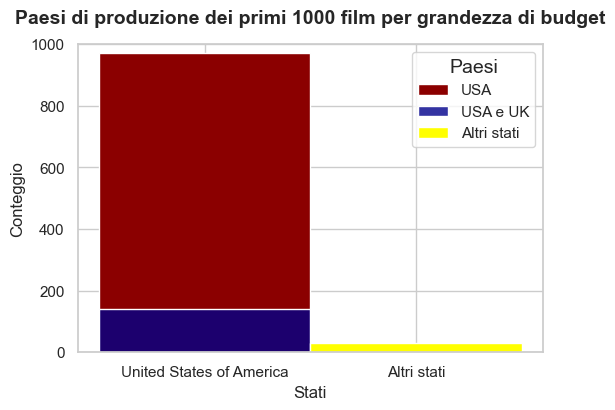

In [21]:
#creo un dataset con solo i film tra i primi 1000 prodotti da UK e USA e uno solo con i stati di nessuno dei due
df_produced_USA = df_first1000_[df_first1000_["produced_by_USA"] == "United States of America"]
df_produced_UK = df_first1000_[df_first1000_["produced_by_UK"] == "United States of America"]
df_produced_others = df_first1000_[df_first1000_["produced_by_USA"] != "United States of America"]

#grafico per dimostrare che i primi 1000 film per budget sono tutti (o quasi) degli USA
sns.set(style = "whitegrid", font_scale=1)
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df_produced_USA["produced_by_USA"], alpha=1.0, color="darkred")
sns.histplot(df_produced_UK["produced_by_UK"], alpha=0.8, color="darkblue")
sns.histplot(df_produced_others["produced_by_USA"], alpha=1.0, color="yellow")
plt.title("Paesi di produzione dei primi 1000 film per grandezza di budget", pad=15, weight="bold", fontsize=14)
plt.xlabel("Stati", fontsize=12)
plt.ylabel("Conteggio", fontsize=12)
ax.set_ylim(0, 1000)
plt.legend(labels=["USA", "USA e UK", "Altri stati"], loc = "upper right", fontsize=11, title = "Paesi", title_fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.show()

In [22]:
df_long_lat = pd.read_csv("dataset_per_geopandas/world_country_and_usa_states_latitude_and_longitude_values.csv", encoding = "utf8")
df_long_lat.rename(columns={"country": "state"}, inplace = True)
df_long_lat0 = df_long_lat.drop(columns= ["country_code", "usa_state_code", "usa_state_latitude", "usa_state_longitude", "usa_state"])
df_long_lat0

,latitude,longitude,state
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [23]:
df_geo = pd.merge(df_paesi0, df_long_lat0, how="left")
#df_geo.loc[113] = ["United States of America", 7147, 37.091211, -95.702891]
df_geo0 = df_geo.sort_values(by="state").reset_index(drop=True)
df_geo0

,state,films,mean_budget,latitude,longitude
0,Afghanistan,1,10000,33.939110,67.709953
1,Albania,2,843,41.153332,20.168331
2,Algeria,3,15100000,28.033886,1.659626
3,American Samoa,1,11430,-14.270972,-170.132217
4,Argentina,72,3285940,-38.416097,-63.616672
...,...,...,...,...,...
120,Uruguay,9,15705892,-32.522779,-55.765835
121,Venezuela,4,426251,6.423750,-66.589730
122,Vietnam,13,3097731,14.058324,108.277199
123,Yugoslavia,3,2403333,NaN,NaN


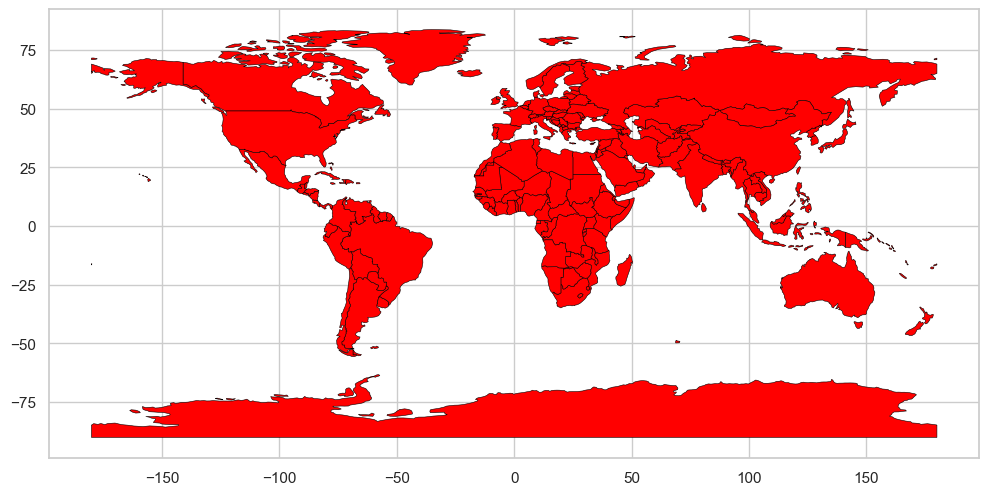

In [24]:
#importo il shapefile del mondo e ne definisco la figura
world = gpd.read_file("dataset_per_geopandas/ne_110m_admin_0_countries.shp")

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax = ax, linewidth = 0.4, color="red", edgecolor="black")
plt.show()

In [25]:
#faccio il merge dei due dataframe
world.rename(columns={"SOVEREIGNT": "state"}, inplace = True)
df_finale = pd.merge(world, df_geo0, how="left")
df_finale

,featurecla,scalerank,LABELRANK,state,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,films,mean_budget,latitude,longitude
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",497.0,26000441.0,56.130366,-106.346771
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",7147.0,29365860.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2.0,4725000.0,42.708678,19.374390
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN


Text(0.43, -0.2, 'Numero di film')

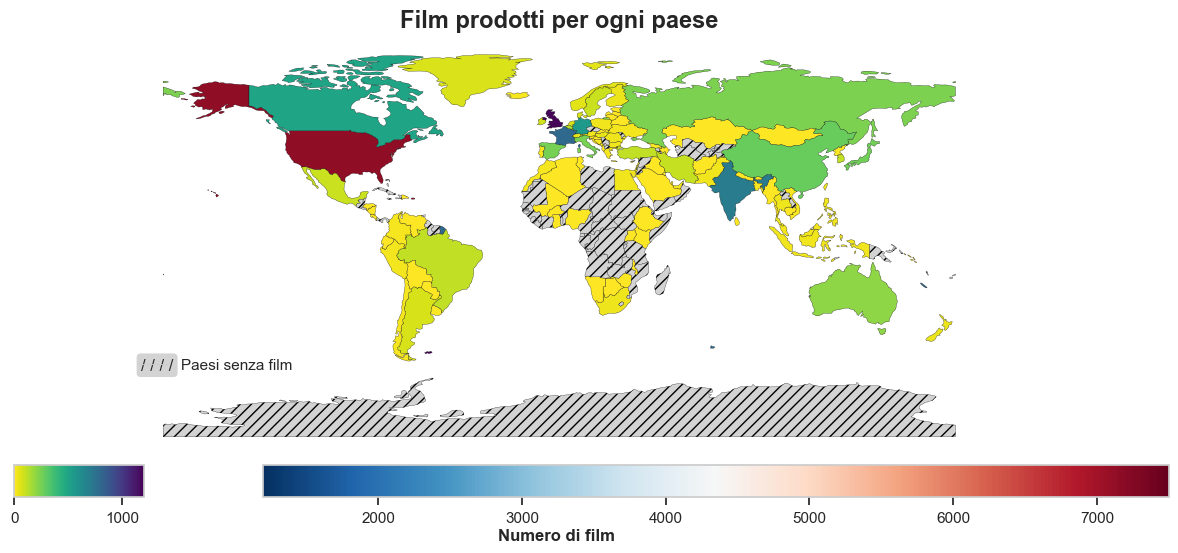

In [26]:
#grafico sul numero di film prodotti da ogni paese
fig, ax = plt.subplots(figsize=(12,6))

df_finale[df_finale["state"] == "United States of America"].plot(column = "films", ax = ax, linewidth = 0.2, cmap = "RdBu_r", legend = False, vmin = 1200, vmax = 7500, edgecolor="black", missing_kwds = {"color": "lightgrey", "hatch": "///"})
df_finale[df_finale["state"] != "United States of America"].plot(column = "films", ax = ax, linewidth = 0.2, cmap = "viridis_r", legend = False, vmin = 0, vmax = 1200, edgecolor="black", missing_kwds = {"color": "lightgrey", "hatch": "///"})


ax.axis("off")
ax.set_title("Film prodotti per ogni paese", fontsize=17, weight="bold")
ax.xaxis.set_visible(False)

norm1 = Normalize(vmin=0, vmax=1200)
norm2 = Normalize(vmin=1200, vmax=7500)
cbar1 = fig.colorbar(ScalarMappable(norm=norm1, cmap="viridis_r"), ax = ax, location = "bottom", orientation = "horizontal", pad = -0.07, fraction =0.07, aspect = 4, anchor = (-0.1, 1.0))
cbar2 = fig.colorbar(ScalarMappable(norm=norm2, cmap="RdBu_r"), ax = ax, location = "bottom", orientation = "horizontal", pad = 0.02, fraction = 0.07, aspect = 28, anchor = (6.9, 1.0))

plt.annotate(text="/ / / /", xycoords=ax, xy =(0, 1), xytext=(0.02, 0.205), bbox=dict(boxstyle="round", facecolor="lightgrey"))
fig.legend(labels=["Paesi senza film"], loc="center left", bbox_to_anchor=(0.15, 0.33), facecolor="white", framealpha=0.0)
plt.annotate(text="Numero di film", xycoords=ax, xy=(0, 0), xytext=(0.43, -0.2), weight="bold")
